# Titanic Survival Analysis Project by Hui Xu 

## Introduction

In this report, we analyze the titanic data to summarize the titanic passengers' information and figure out the relationship between passengers' survival and other variables, such as gender, class and age. 

We first wrangle data for our analysis. Then, we determine which variables we will use for our analysis and which variables we will exclude for our analysis. Finally, we conclude our analysis of the relationship between passengers' survival and those critical variables. 

## Data Loading and Wrangling

In [72]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic= pd.read_csv('/Users/HuiXu/Desktop/Udacity/Data_Analysis/titanic_data.csv')

In [73]:
#see the variable of dataframe
print len(titanic)
print titanic.head()
print titanic.tail()
titanic.dtypes

891
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

After loading the titanic data and checking the length of the data and the type of each variable, we find that there are 891 passengers in the Titanic. The data includes 12 variables, which are the passenger ID, survival, passenger class, name, sex, age, number of sibling/spouse on board, number of parents/children on board, ticket numbers,fares, cabin number, embarked information of the passenger. 

Of those variables, PassengerId, Survived Pclass, SibSp and Parch in the orginal data are integer variables. However, the variable of Survived only contains 2 values: 1 - represents survived and 0 - represents died. So we will convert the data type of survived to boolean to make our further analysis more convenient. In addition, Pclass variable is the same to Survived variable. It only has 3 values, which represent different classes for each passenger. So we will convert the data type of Pclass to object.

In [74]:
# convert data type of survived to boolean and Pclass to object
titanic['Survived'] = titanic['Survived'].astype(bool)
titanic['Pclass'] = titanic['Pclass'].astype(object)
titanic.dtypes

PassengerId      int64
Survived          bool
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The type of each variable looks good for our analysis. So in the next step, we will check the missing values in our data frame.

In [75]:
#Check whether our data frame has some value missing.
titanic.isnull().values.any()

True

In [76]:
#There are some missing values in our dataframe. So in the next step, we will find in which column the value is missing.
df_isnull=titanic.isnull()
df_isnull.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The table above shows the number of missing values for each variable. We can see from this table that our dataset has 177 missing values for passenger age information, 687 missing values for passenger Cabin information and 2 missing values for passenger embarked information. 

From our intuition, passengers' age should be closely related to the passengers' survival. So we just leave the missing value blank and do not replace the missing values with any numbers in case that these numbers replaced have large effect on our final result. 

In addition, considering that 687 missing values of cabin account for a large part of 891 pieces of data in total,  we will give up our analysis for the relationship between passenger's cabin and survival because of the potential bias the missing values lead. 

Passengers' embarked information just has 2 missing values. We will leave these values blank since they don't have a big impact to our final results.

## Data Analysis

In the Data Analysis part, we will focus on the relationship between each variables and figure out the variables which are related to passengers' survival.

In [77]:
titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


The sheet above shows statistics about numerical variables. Since the passenger ID is the unique numbers for each passenger, it is useless in our analysis. So We can delete this variable.

In [78]:
#describe categorical data
titanic[['Pclass','Name','Sex','Ticket','Cabin','Embarked']].describe()

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,3,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,491,1,577,7,4,644


From the summary of categorical variables, we find that there are 891 unique values for passenger name. So it is not a good idea to use names to predict survival since each passenger has a unique name. We can definitely group the passenger by last name. But this is a huge work and this kind of information is already included in the SibSp and Parch variables. So we will exclude the passengers' name in further analysis. In addition, there are 681 unique values for tickets. So the ticket is also not a good variable to help us predict the survival. Cabin have 147 unique values. Considering the 687 missing values for passenger Cabin information, we won't include this variable for further analysis since we have too many missing values for it. Passenger Embarked information just has 3 unique values. we will group these values and figure out the relationship between it and passengers' survival in the next step.

In [79]:
titanic.groupby('Survived').mean()[['Age','SibSp','Parch','Fare']]

,Age,SibSp,Parch,Fare
Survived,,,,
False,30.626179,0.553734,0.329690,22.117887
True,28.343690,0.473684,0.464912,48.395408


Grouping the passengers by survived and calculating the mean of Passenger's class, age, siblings or spouses on board, parents or children on board, we found that the survived passengers tended to have a higher passenger class compared to the passengers who didn't survive. Their average ticket fares are much more expensive than the victims. Also, it seemed that the survivals tended to have parents or children on board with them. We will do the further analysis in the next step.

In [80]:
survived_df = titanic.groupby('Survived').count()[['PassengerId']].rename(columns={'PassengerId':'Total_Numbers'}).reset_index()

In [81]:
print survived_df

   Survived  Total_Numbers
0     False            549
1      True            342


In [82]:
survived_sex_df = titanic.groupby(['Survived','Sex']).count()[['PassengerId']].rename(columns={'PassengerId':'Total_Numbers'}).reset_index()
print survived_sex_df
survived_sex_df = survived_sex_df.pivot_table('Total_Numbers','Sex','Survived')
print survived_sex_df




   Survived     Sex  Total_Numbers
0     False  female             81
1     False    male            468
2      True  female            233
3      True    male            109
Survived  False  True 
Sex                   
female       81    233
male        468    109


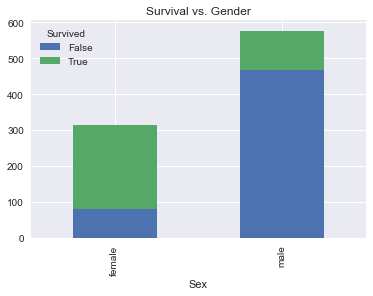

In [83]:

survived_sex_df.plot(kind='bar',stacked = True, title = 'Survival vs. Gender');


We can see from the Survival vs. Gender bar graph that Sex variable seems to be related to survived and that female, compared with male, tend to be survived in the titanic accident.

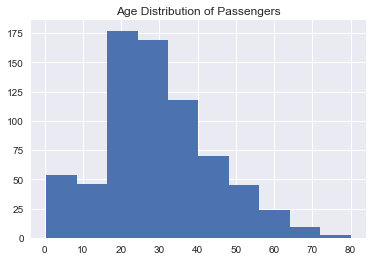

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [84]:
plt.hist(titanic['Age'].dropna(axis = 0, how = 'any'))
plt.title('Age Distribution of Passengers')
plt.show()
titanic['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
False,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
True,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


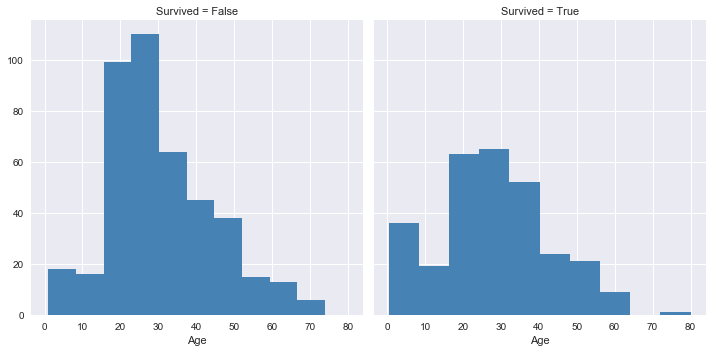

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(titanic,  col="Survived", margin_titles=True , size =5)

g.map(plt.hist, "Age", color="steelblue",  lw=0)
titanic.groupby('Survived').describe()['Age']

The summary of the age and survival and the three histgram graphs above show the passengers' age distribution for the survival and died. Both means are around 30 and standard deviations are about 14. 

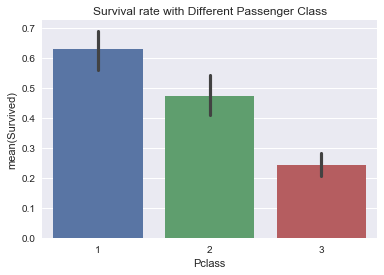

In [86]:
sns.barplot(x="Pclass", y="Survived", data=titanic);
plt.title("Survival rate with Different Passenger Class")

From the graph above, we can find that the passengers' class seems to be closely related to survival. First class passengers tend to be survived in the titanic accident and the 3rd class passengers has a relatively low survival rate.

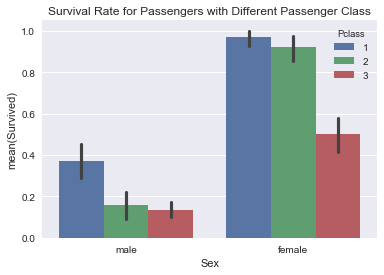

In [87]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic);
plt.title("Survival Rate for Passengers with Different Passenger Class")

This bar graph proves that no matter what the passenger class is, there is a larger poossibility for female to survive in the titanic accident.

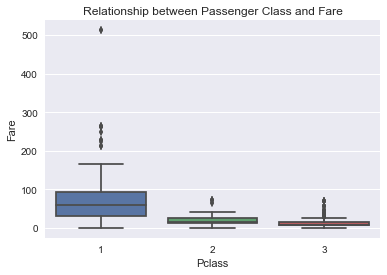

In [88]:
sns.boxplot(x="Pclass", y="Fare", data=titanic);
plt.title('Relationship between Passenger Class and Fare')

In [89]:
titanic.groupby('Pclass').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


The fare is closely related to passenger class. The first class passengers tend to have more expensive fares. 

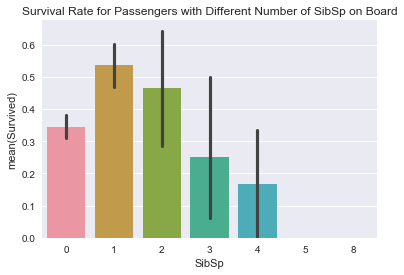

In [90]:
sns.barplot(x="SibSp", y="Survived", data=titanic);
plt.title("Survival Rate for Passengers with Different Number of SibSp on Board")

From the summary above, we can see that if the passenger has 1 or 2 siblings/Spouse at Titanic, they will have more chance to survive.

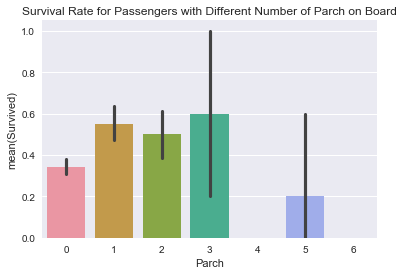

In [91]:
sns.barplot(x="Parch", y="Survived", data=titanic);
plt.title("Survival Rate for Passengers with Different Number of Parch on Board")

Summarizing the survival rate of passengers with and childern/parents on board, we find that passengers having children/parents tend to be survived in the titanic. Passengers with 3 Parents/Children tend to be survived in the Titanic accident.

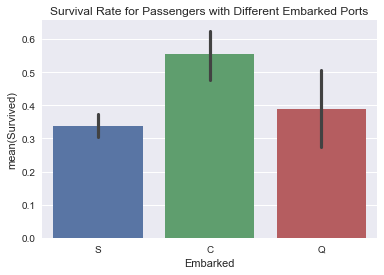

In [92]:
sns.barplot(x="Embarked", y="Survived", data=titanic);
plt.title("Survival Rate for Passengers with Different Embarked Ports")

From the barchart above, we can find that passengers embarked from Cherbourg have a larger chance of surviving.

## Conclusion


### Analysis Conclusion Based on Titanic Dataset

In this report, we choose 6 critical variables among the 11 variables to test the relationship between those variables and passengers' survival rate. 

After completing the analysis above, we could get the following conclusions:
1. Compared to male, female tend to survive in the titanic accident.
2. The age of passengers don't have a obvious relationship with passengers' survival.
3. First class passengers tend to survive, compared to 2nd class and 3rd class passengers.
4. The passengers that have children or parents with tend to survived. The more children the passengers have, the more chance they could survive. 
5. The passengers having 1 or 2 siblings/spouse or children/parents tend to be survived in the titanic.
6. The passengers embarked from Cherbourg have a higher survival rate compared to passengers embarked from other ports.

### Limitations of Analysis

There are several limitation of our reports based on the dataset given:

First, we don't conclude any relationship between passengers' age and survival rate in our analysis. Maybe the 177 missing values of age play an important role in this analysis. 

Second, we don't do much analysis about the cross-sectional impact.

Third, the dataset has some limitations which may be misleading. For example, in the dataset, it just contains 11 factors that may affect the passengers' survival rate. In reality, many other factors may have an impact on passengers' survival, for example, the location of the passengers when the accident happened could effect the passengers' survival and the education of passengers could play a role in it.